In [2]:
import sqlite3
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook

conn = sqlite3.connect('full_conversation_database.db')
df = pd.read_sql('SELECT * from tweets', conn)
df.head(3)

,id_str,text,lang,created_at,in_reply_to_status_id,in_reply_to_user_id,in_reply_to_screen_name,"('user', 'id_str')"
0,780682646854787072,@johnnymowlem @VirginAtlantic @IMSA @BAR1Motor...,en,Tue Sep 27 08:17:02 +0000 2016,7.806784e+17,107695463.0,johnnymowlem,224166213
1,780682647429414912,RT @JulieThoin: L'audience reprend. Examen du ...,fr,Tue Sep 27 08:17:02 +0000 2016,NaN,NaN,None,41935535
2,780682655104991232,Flew into Gatwick last night. 5 hour drive nor...,en,Tue Sep 27 08:17:04 +0000 2016,7.806784e+17,165883353.0,gforsterphoto,220691420


In [59]:
df['weekday'] = [f'{datetime.datetime.strptime(tweet, "%a %b %d %H:%M:%S +0000 %Y").strftime("%a")}' for tweet in df['created_at']]
df['hour'] = [f'{datetime.datetime.strptime(tweet, "%a %b %d %H:%M:%S +0000 %Y").hour}' for tweet in df['created_at']]


In [60]:
df['weekday'] = df['weekday'].replace('weekday', {'Mon': 0, 'Tue':1, 
                                                  'Wed' : 2, 'Thu' : 3, 
                                                  'Fri' : 4, 'Sat' : 5, 
                                                  'Sun' : 6}, axis=0)

/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:4480: UserWarning: the "axis" argument is deprecated and will be removed inv0.13; this argument has no effect
  warnings.warn('the "axis" argument is deprecated '


In [61]:
df['weekday']

0          None
1          None
2          None
3          None
4          None
5          None
6          None
7          None
8          None
9          None
10         None
11         None
12         None
13         None
14         None
15         None
16         None
17         None
18         None
19         None
20         None
21         None
22         None
23         None
24         None
25         None
26         None
27         None
28         None
29         None
           ... 
5444219    None
5444220    None
5444221    None
5444222    None
5444223    None
5444224    None
5444225    None
5444226    None
5444227    None
5444228    None
5444229    None
5444230    None
5444231    None
5444232    None
5444233    None
5444234    None
5444235    None
5444236    None
5444237    None
5444238    None
5444239    None
5444240    None
5444241    None
5444242    None
5444243    None
5444244    None
5444245    None
5444246    None
5444247    None
5444248    None
Name: weekday, Length: 5

In [4]:
KLM_outgoing = df[df["('user', 'id_str')"] == "56377143"]
BA_outgoing = df[df["('user', 'id_str')"] == "18332190"]
print(f'Outgoing KLM tweets: {len(KLM_outgoing)}')
print(f'Outgoing BA tweets: {len(BA_outgoing)}')

Outgoing KLM tweets: 86077
Outgoing BA tweets: 150224


In [ ]:
KLM_incoming_hours = []
BA_incoming_hours = []
for i, item in tqdm_notebook(df[['text', 'weekday_hour']].iterrows()):
    if '@KLM' in item['text']:
        KLM_incoming_hours.append(item['weekday_hour'])
    elif '@British_Airways' in item['text']:
        BA_incoming_hours.append(item['weekday_hour'])
        
KLM_incoming = pd.Series(KLM_incoming_hours)
BA_incoming = pd.Series(BA_incoming_hours)

#Save data
KLM_incoming.to_csv('KLM_incoming.csv', index=False)
BA_incoming.to_csv('BA_incoming.csv', index=False)

In [5]:
# Read in incoming data
KLM_incoming = pd.read_csv('KLM_incoming.csv', names=['weekday_hour'])['weekday_hour']
BA_incoming = pd.read_csv('BA_incoming.csv', names=['weekday_hour'])['weekday_hour']

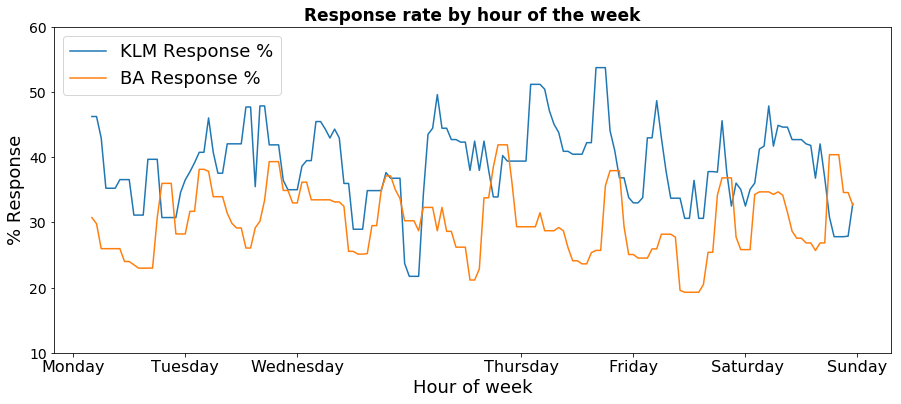

In [23]:
KLM_delta_incoming_outgoing = KLM_outgoing['weekday_hour'].value_counts().sort_index().divide(KLM_incoming.value_counts().sort_index()).values
BA_delta_incoming_outgoing = BA_outgoing['weekday_hour'].value_counts().sort_index().divide(BA_incoming.value_counts().sort_index()).values
plt.figure(figsize=(15,6))
plt.plot(range(168), pd.Series(KLM_delta_incoming_outgoing*100).rolling(5).median())
plt.plot(range(168), pd.Series(BA_delta_incoming_outgoing*100).rolling(5).median())
plt.title(f'Response rate by hour of the week', fontsize=17, weight='bold')
plt.legend(['KLM Response %', 'BA Response %'], fontsize=18, loc=2)
plt.ylabel('% Response', fontsize=18)
plt.xlabel('Hour of week', fontsize=18)
plt.xticks([0,24,48,96,120,144,168], ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', ' Saturday', 'Sunday'], fontsize=16)
plt.yticks([10,20,30,40,50,60], fontsize=14);
#plt.savefig('response_rate_KLM.png', dpi=300)


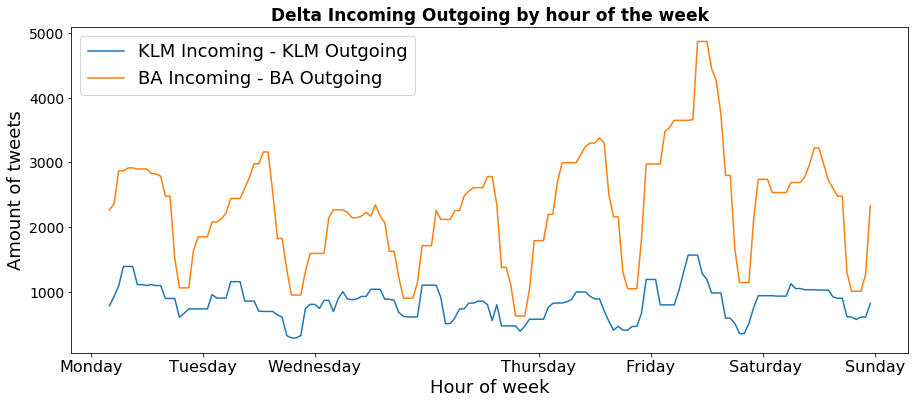

In [24]:
KLM_delta_incoming_outgoing = KLM_incoming.value_counts().sort_index().subtract(KLM_outgoing['weekday_hour'].value_counts().sort_index()).values
BA_delta_incoming_outgoing = BA_incoming.value_counts().sort_index().subtract(BA_outgoing['weekday_hour'].value_counts().sort_index()).values
plt.figure(figsize=(15,6))
plt.plot(range(168), pd.Series(KLM_delta_incoming_outgoing).rolling(5).median())
plt.plot(range(168), pd.Series(BA_delta_incoming_outgoing).rolling(5).median())
plt.title(f'Delta Incoming Outgoing by hour of the week', fontsize=17, weight='bold')
plt.legend(['KLM Incoming - KLM Outgoing', 'BA Incoming - BA Outgoing'], fontsize=18, loc=2)
plt.ylabel('Amount of tweets', fontsize=18)
plt.xlabel('Hour of week', fontsize=18)
plt.xticks([0,24,48,96,120,144,168], ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', ' Saturday', 'Sunday'], fontsize=16)
plt.yticks(fontsize=14);
#plt.savefig('response_rate_KLM.png', dpi=300)

In [ ]:
#BA_delta_incoming_outgoing = BA_incoming.value_counts().sort_index().subtract(BA_outgoing['weekday_hour'].value_counts().sort_index()).values

#plt.figure(figsize=(15,6))
#plt.plot(range(168), BA_delta_incoming_outgoing)
#plt.plot(range(168), BA_incoming.value_counts().sort_index().values)
#plt.title(f'Tweets by time of day for British Airways / Total = {len(BA_outgoing)+len(BA_incoming)} tweets', fontsize=17, weight='bold')
#plt.legend(['British Airways outgoing', 'British Airways Incoming'], fontsize=18, loc=2)
#plt.ylabel('Amount of tweets', fontsize=18)
#plt.xlabel('Hour of week', fontsize=18)
#plt.xticks(range(24), fontsize=16)
#plt.yticks(fontsize=14);
#plt.savefig('incoming_outgoing_BA.png', dpi=300)

## Old Code

In [ ]:
#KLM_DM_tweets = []
#for i, item in KLM_outgoing[['text', 'id_str']].iterrows():
#    for word in ['privé bericht', 'direct message', 'private message', 'dm']:
#        if word in item['text'].lower():
#            KLM_DM_tweets.append(item['id_str'])
    #if ['privé bericht', 'direct message', 'private message', 'DM']  in item['text'].lower():
        #KLM_DM_tweets.append(item['id_str'])
#        if i % 100000 == 0:
#            print(f'Working on {i}th line')

In [ ]:
#BA_DM_tweets = []
#for i, item in BA_outgoing[['text', 'id_str']].iterrows():
#    for word in ['privé bericht', 'direct message', 'private message', 'dm']:
#        if word in item['text'].lower():
#            BA_DM_tweets.append(item['id_str'])
    #if ['privé bericht', 'direct message', 'private message', 'DM']  in item['text'].lower():
        #KLM_DM_tweets.append(item['id_str'])
#        if i % 100000 == 0:
#            print(f'Working on {i}th line')

In [ ]:
#KLM_incoming_hours = []
#BA_incoming_hours = []
#for i, item in tqdm_notebook(df[['text', 'weekday_hour']].iterrows()):
#    if '@KLM' in item['text']:
#        KLM_incoming_hours.append(item['weekday_hour'])
#    elif '@British_Airways' in item['text']:
#        BA_incoming_hours.append(item['weekday_hour'])
        
#KLM_incoming = pd.Series(KLM_incoming_hours)
#BA_incoming = pd.Series(BA_incoming_hours)

# Save data
#KLM_incoming.to_csv('KLM_incoming.csv', index=False)
#BA_incoming.to_csv('BA_incoming.csv', index=False)

In [ ]:
pd.read_excel()